# Marvel Movies Dataset - Movie Runtime

## Load required packages

In [1]:
# MARVEL MOVIES DATASET ANALYSIS
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load Data

In [2]:
marvel_movies = pd.read_csv('mcu_box_office.csv')

## Data checks

#### How Many Rows and Columns does the data have?

In [3]:
marvel_movies.shape

(27, 10)

#### What are the column names?

In [4]:
marvel_movies.columns

Index(['movie_title', 'mcu_phase', 'release_date', 'tomato_meter',
       'audience_score', 'movie_duration', 'production_budget',
       'opening_weekend', 'domestic_box_office', 'worldwide_box_office'],
      dtype='object')

#### Look at the first 5 rows

In [5]:
marvel_movies.head()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"


#### Describe the various values, what are the maximum and minimum values?

In [6]:
marvel_movies.describe()

,mcu_phase,tomato_meter,audience_score,movie_duration
count,27.000000,27.000000,27.000000,27.000000
mean,2.481481,83.555556,83.740741,131.925926
std,1.014145,11.112479,11.002072,15.531422
min,1.000000,47.000000,45.000000,111.000000
25%,2.000000,79.000000,78.000000,122.500000
50%,3.000000,87.000000,87.000000,130.000000
75%,3.000000,91.500000,91.000000,138.000000
max,4.000000,96.000000,98.000000,181.000000


#### Are there any missing values?

In [7]:
marvel_movies.isna().any()

movie_title             False
mcu_phase               False
release_date            False
tomato_meter            False
audience_score          False
movie_duration          False
production_budget       False
opening_weekend         False
domestic_box_office     False
worldwide_box_office    False
dtype: bool

#### What are each columns datatypes?

In [8]:
marvel_movies.dtypes

movie_title             object
mcu_phase                int64
release_date            object
tomato_meter             int64
audience_score           int64
movie_duration           int64
production_budget       object
opening_weekend         object
domestic_box_office     object
worldwide_box_office    object
dtype: object

#### Converting the budgets from objects into number 

In [9]:
marvel_movies['production_budget'] = marvel_movies['production_budget'].str.split(
    ',').str.join("").astype(float)
marvel_movies['opening_weekend'] = marvel_movies['opening_weekend'].str.split(
    ',').str.join("").astype(float)
marvel_movies['domestic_box_office'] = marvel_movies['domestic_box_office'].str.split(
    ',').str.join("").astype(float)
marvel_movies['worldwide_box_office'] = marvel_movies['worldwide_box_office'].str.split(
    ',').str.join("").astype(float)


#### Converting Release date to datetime object.

In [10]:
marvel_movies.release_date = pd.to_datetime(marvel_movies.release_date)

#### Does the data contain any duplicate rows?

In [11]:
marvel_movies.duplicated().any()

False

## Data Visualization

### How long were the movies?

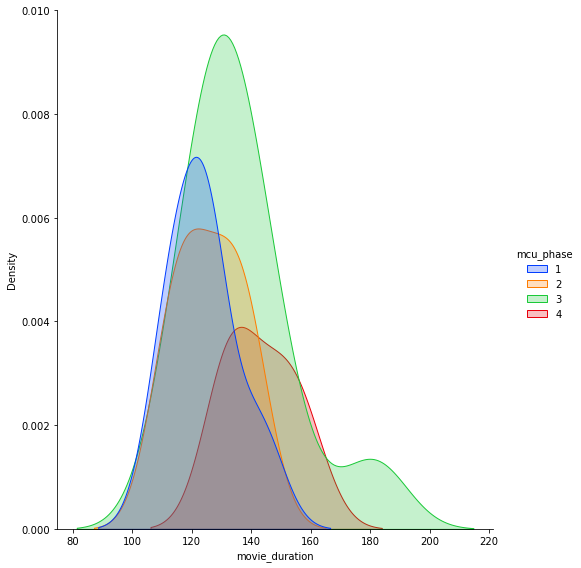

In [12]:
sns.displot(data=marvel_movies, x='movie_duration', hue='mcu_phase', kind='kde',
            fill=True, palette=sns.color_palette('bright')[:4], height=8, aspect=0.9)


#### Have the movies gotten longer?

<AxesSubplot:xlabel='movie_title', ylabel='movie_duration'>

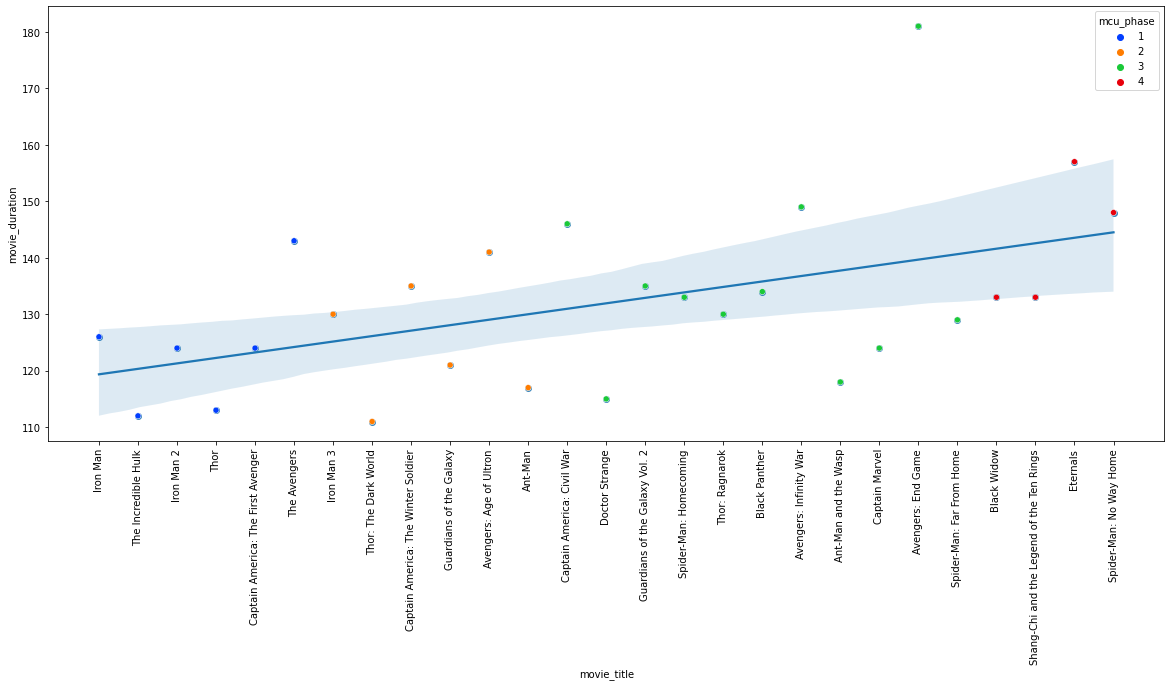

In [13]:

plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.regplot(x=marvel_movies.index, y="movie_duration", data=marvel_movies)
sns.scatterplot(data=marvel_movies, x="movie_title",
                y="movie_duration", hue="mcu_phase", palette=sns.color_palette('bright')[:4])
